In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dashboard Inspiration: 

For the Scandinavian vacation planner dashboard, something like this would be cool. 
It must give: 

1. clear overview of weather patterns one can expect in the city, through KPIs and graphs. 

2. It must be filterable to view the different cities we focus on. 


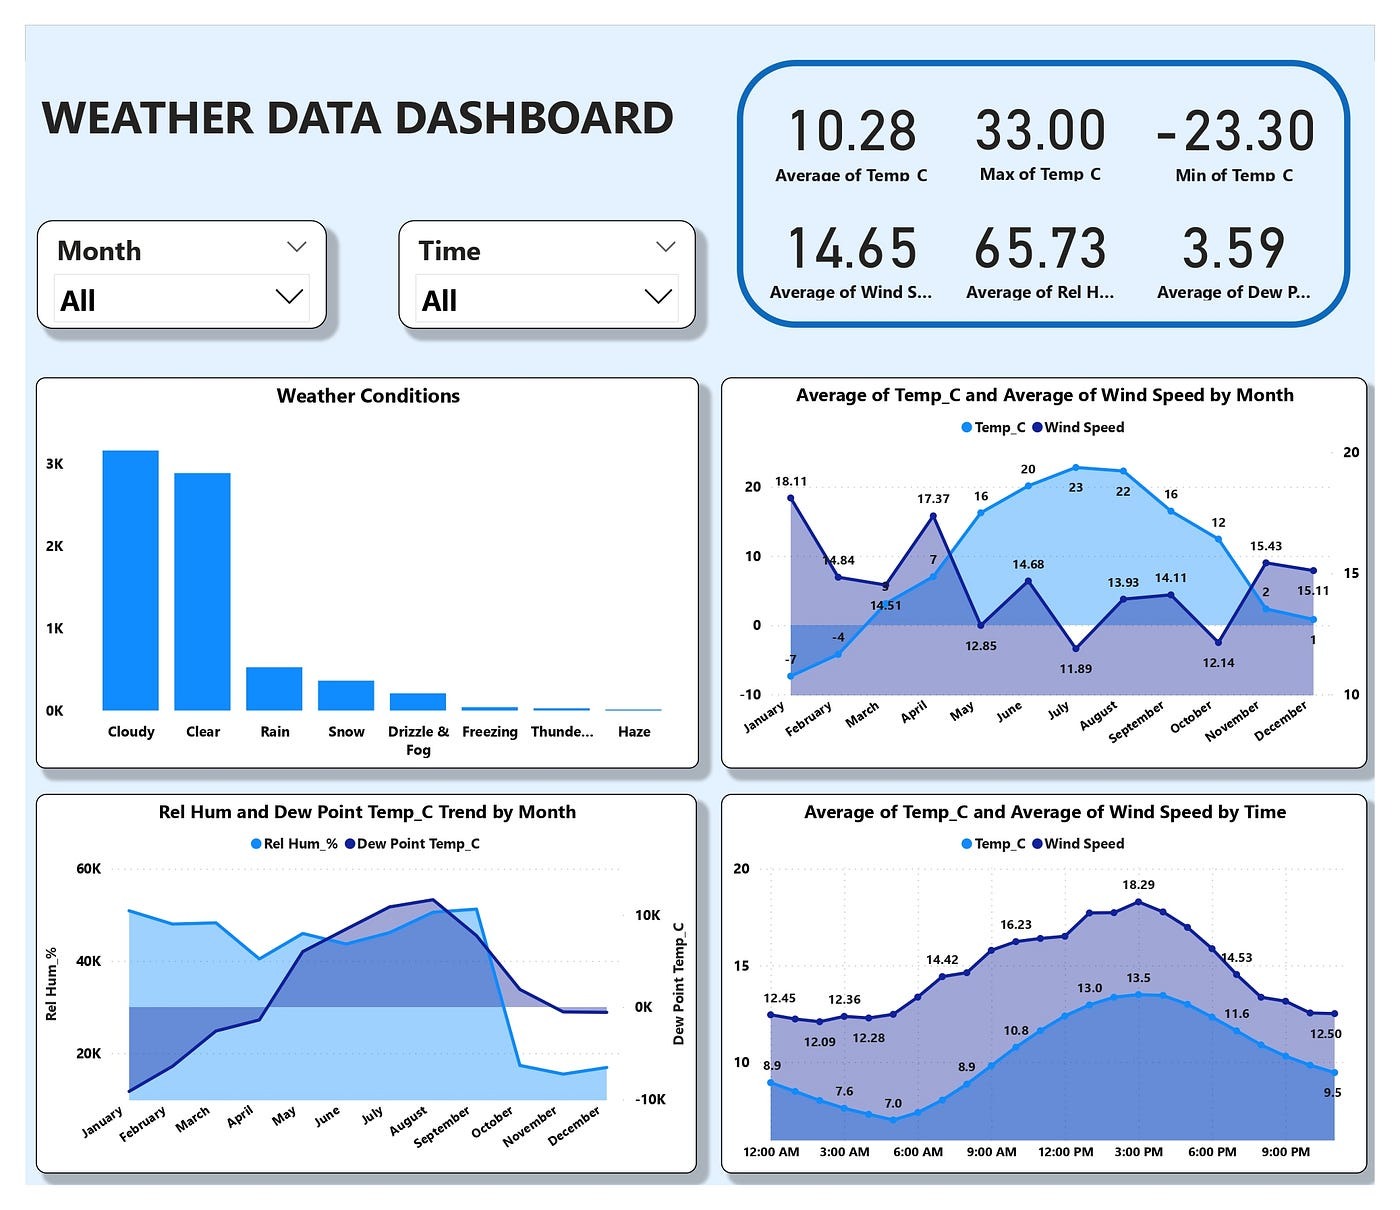

In addition to a weather dashboard, data on accomodation would be usefull for a vacation planner. Either integrate this into weather dashboard or make two separate. 

# Bekkelaget - kun sykkel

In [2]:
bekk = pd.read_csv('C:/Users/stian/OneDrive/Dokumenter/Python Scripts/.venv/BDPBI/bekkelaget.csv', delimiter=';')
bekk.head()

C:\Users\stian\AppData\Local\Temp\ipykernel_22136\1722833184.py:1: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  bekk = pd.read_csv('C:/Users/stian/OneDrive/Dokumenter/Python Scripts/.venv/BDPBI/bekkelaget.csv', delimiter=';')


,Trafikkregistreringspunkt,Navn,Vegreferanse,Fra,Til,Dato,Fra tidspunkt,Til tidspunkt,Felt,Trafikkmengde,...,Ikke gyldig lengde,Lengdekvalitetsgrad (%),"< 5,6m",">= 5,6m","5,6m - 7,6m","7,6m - 12,5m","12,5m - 16,0m",">= 16,0m","16,0m - 24,0m",">= 24,0m"
0,20783B1984786,Bekkelaget (fortau),EV18 S56D100 m1163,2022-11-15T00:00+01:00,2022-11-15T01:00+01:00,2022-11-15,00:00,01:00,1,0,...,0,"100,00",-,-,-,-,-,-,-,-
1,20783B1984786,Bekkelaget (fortau),EV18 S56D100 m1163,2022-11-15T00:00+01:00,2022-11-15T01:00+01:00,2022-11-15,00:00,01:00,2,0,...,0,"100,00",-,-,-,-,-,-,-,-
2,20783B1984786,Bekkelaget (fortau),EV18 S56D100 m1163,2022-11-15T00:00+01:00,2022-11-15T01:00+01:00,2022-11-15,00:00,01:00,Totalt i retning Moss,0,...,0,"100,00",-,-,-,-,-,-,-,-
3,20783B1984786,Bekkelaget (fortau),EV18 S56D100 m1163,2022-11-15T00:00+01:00,2022-11-15T01:00+01:00,2022-11-15,00:00,01:00,Totalt i retning Oslo,0,...,0,"100,00",-,-,-,-,-,-,-,-
4,20783B1984786,Bekkelaget (fortau),EV18 S56D100 m1163,2022-11-15T00:00+01:00,2022-11-15T01:00+01:00,2022-11-15,00:00,01:00,Totalt,0,...,0,"100,00",-,-,-,-,-,-,-,-


In [3]:
print(bekk.shape)
print(bekk.Felt.unique())


(131640, 24)
['1' '2' 'Totalt i retning Moss' 'Totalt i retning Oslo' 'Totalt']


In [4]:
bekk.columns

Index(['Trafikkregistreringspunkt', 'Navn', 'Vegreferanse', 'Fra', 'Til',
       'Dato', 'Fra tidspunkt', 'Til tidspunkt', 'Felt', 'Trafikkmengde',
       'Dekningsgrad (%)', 'Antall timer total', 'Antall timer inkludert',
       'Antall timer ugyldig', 'Ikke gyldig lengde', 'Lengdekvalitetsgrad (%)',
       '< 5,6m', '>= 5,6m', '5,6m - 7,6m', '7,6m - 12,5m', '12,5m - 16,0m',
       '>= 16,0m', '16,0m - 24,0m', '>= 24,0m'],
      dtype='object')

In [5]:
bekk[bekk['Felt']=='Totalt']

,Trafikkregistreringspunkt,Navn,Vegreferanse,Fra,Til,Dato,Fra tidspunkt,Til tidspunkt,Felt,Trafikkmengde,...,Ikke gyldig lengde,Lengdekvalitetsgrad (%),"< 5,6m",">= 5,6m","5,6m - 7,6m","7,6m - 12,5m","12,5m - 16,0m",">= 16,0m","16,0m - 24,0m",">= 24,0m"
4,20783B1984786,Bekkelaget (fortau),EV18 S56D100 m1163,2022-11-15T00:00+01:00,2022-11-15T01:00+01:00,2022-11-15,00:00,01:00,Totalt,0,...,0,"100,00",-,-,-,-,-,-,-,-
9,20783B1984786,Bekkelaget (fortau),EV18 S56D100 m1163,2022-11-15T01:00+01:00,2022-11-15T02:00+01:00,2022-11-15,01:00,02:00,Totalt,0,...,0,"100,00",-,-,-,-,-,-,-,-
14,20783B1984786,Bekkelaget (fortau),EV18 S56D100 m1163,2022-11-15T02:00+01:00,2022-11-15T03:00+01:00,2022-11-15,02:00,03:00,Totalt,2,...,2,"0,00",-,-,-,-,-,-,-,-
19,20783B1984786,Bekkelaget (fortau),EV18 S56D100 m1163,2022-11-15T03:00+01:00,2022-11-15T04:00+01:00,2022-11-15,03:00,04:00,Totalt,0,...,0,"100,00",-,-,-,-,-,-,-,-
24,20783B1984786,Bekkelaget (fortau),EV18 S56D100 m1163,2022-11-15T04:00+01:00,2022-11-15T05:00+01:00,2022-11-15,04:00,05:00,Totalt,1,...,1,"0,00",-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131619,20783B1984786,Bekkelaget (fortau),EV18 S56D100 m1163,2025-11-15T19:00+01:00,2025-11-15T20:00+01:00,2025-11-15,19:00,20:00,Totalt,4,...,4,"0,00",-,-,-,-,-,-,-,-
131624,20783B1984786,Bekkelaget (fortau),EV18 S56D100 m1163,2025-11-15T20:00+01:00,2025-11-15T21:00+01:00,2025-11-15,20:00,21:00,Totalt,9,...,9,"0,00",-,-,-,-,-,-,-,-
131629,20783B1984786,Bekkelaget (fortau),EV18 S56D100 m1163,2025-11-15T21:00+01:00,2025-11-15T22:00+01:00,2025-11-15,21:00,22:00,Totalt,2,...,2,"0,00",-,-,-,-,-,-,-,-
131634,20783B1984786,Bekkelaget (fortau),EV18 S56D100 m1163,2025-11-15T22:00+01:00,2025-11-15T23:00+01:00,2025-11-15,22:00,23:00,Totalt,1,...,1,"0,00",-,-,-,-,-,-,-,-


In [6]:
bekk['Lengdekvalitetsgrad (%)'].value_counts(normalize=True)

Lengdekvalitetsgrad (%)
0,00      0.723519
100,00    0.241462
-         0.035020
Name: proportion, dtype: float64

# Frogner - Sykkel og Bil

In [75]:
nov22_23 = pd.read_csv("C:/Users/stian/OneDrive/Dokumenter/Python Scripts/.venv/BDPBI/2022-2023.csv", 
                       delimiter=';', 
                       encoding='cp1252')
nov23_25 = pd.read_csv("C:/Users/stian/OneDrive/Dokumenter/Python Scripts/.venv/BDPBI/2023-2025.csv",
                        delimiter=';', 
                       encoding='cp1252')

f = pd.concat([nov22_23, nov23_25])
f.head()

C:\Users\stian\AppData\Local\Temp\ipykernel_22136\1075958666.py:1: DtypeWarning: Columns (16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  nov22_23 = pd.read_csv("C:/Users/stian/OneDrive/Dokumenter/Python Scripts/.venv/BDPBI/2022-2023.csv",
C:\Users\stian\AppData\Local\Temp\ipykernel_22136\1075958666.py:4: DtypeWarning: Columns (9,14,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  nov23_25 = pd.read_csv("C:/Users/stian/OneDrive/Dokumenter/Python Scripts/.venv/BDPBI/2023-2025.csv",


,Trafikkregistreringspunkt,Navn,Vegreferanse,Fra,Til,Dato,Fra tidspunkt,Til tidspunkt,Felt,Trafikkmengde,...,Ikke gyldig lengde,Lengdekvalitetsgrad (%),"< 5,6m",">= 5,6m","5,6m - 7,6m","7,6m - 12,5m","12,5m - 16,0m",">= 16,0m","16,0m - 24,0m",">= 24,0m"
0,70429B619257,Frognerstranda sykkel 03,EV18 S55D105 m3721,2022-11-01T00:00+01:00,2022-11-01T01:00+01:00,2022-11-01,00:00,01:00,1,1,...,1,"0,00",-,-,-,-,-,-,-,-
1,70429B619257,Frognerstranda sykkel 03,EV18 S55D105 m3721,2022-11-01T00:00+01:00,2022-11-01T01:00+01:00,2022-11-01,00:00,01:00,2,0,...,0,"100,00",-,-,-,-,-,-,-,-
2,70429B619257,Frognerstranda sykkel 03,EV18 S55D105 m3721,2022-11-01T00:00+01:00,2022-11-01T01:00+01:00,2022-11-01,00:00,01:00,Totalt i retning Bygdøy,1,...,1,"0,00",-,-,-,-,-,-,-,-
3,70429B619257,Frognerstranda sykkel 03,EV18 S55D105 m3721,2022-11-01T00:00+01:00,2022-11-01T01:00+01:00,2022-11-01,00:00,01:00,Totalt i retning Vika,0,...,0,"100,00",-,-,-,-,-,-,-,-
4,70429B619257,Frognerstranda sykkel 03,EV18 S55D105 m3721,2022-11-01T00:00+01:00,2022-11-01T01:00+01:00,2022-11-01,00:00,01:00,Totalt,1,...,1,"0,00",-,-,-,-,-,-,-,-


In [77]:
f['Felt'].unique()

array(['1', '2', 'Totalt i retning Bygdøy', 'Totalt i retning Vika',
       'Totalt', '3', '4', '5', '6', '8', 'Totalt i retning Drammen',
       'Totalt i retning Oslo'], dtype=object)

In [80]:
#Only looking at total 
f = f[f['Felt'] == 'Totalt']

In [98]:
print(f'we now have: {f.shape[0]} rows in the dataset')

we now have: 52656 rows in the dataset


In [95]:
f.Trafikkmengde.unique()

array([1, 2, 0, ..., 1764, 3757, 2824], shape=(10190,), dtype=object)

Checking missing values.

In [96]:
f[f['Trafikkmengde'] == '-']

,Trafikkregistreringspunkt,Navn,Vegreferanse,Fra,Til,Dato,Fra tidspunkt,Til tidspunkt,Felt,Trafikkmengde,...,Ikke gyldig lengde,Lengdekvalitetsgrad (%),"< 5,6m",">= 5,6m","5,6m - 7,6m","7,6m - 12,5m","12,5m - 16,0m",">= 16,0m","16,0m - 24,0m",">= 24,0m"
93139,79755V625294,Maritim,EV18 S55D1 m1561,2023-11-23T01:00+01:00,2023-11-23T02:00+01:00,2023-11-23,01:00,02:00,Totalt,-,...,-,-,-,-,-,-,-,-,-,-
93149,79755V625294,Maritim,EV18 S55D1 m1561,2023-11-23T02:00+01:00,2023-11-23T03:00+01:00,2023-11-23,02:00,03:00,Totalt,-,...,-,-,-,-,-,-,-,-,-,-
93159,79755V625294,Maritim,EV18 S55D1 m1561,2023-11-23T03:00+01:00,2023-11-23T04:00+01:00,2023-11-23,03:00,04:00,Totalt,-,...,-,-,-,-,-,-,-,-,-,-
93169,79755V625294,Maritim,EV18 S55D1 m1561,2023-11-23T04:00+01:00,2023-11-23T05:00+01:00,2023-11-23,04:00,05:00,Totalt,-,...,-,-,-,-,-,-,-,-,-,-
93179,79755V625294,Maritim,EV18 S55D1 m1561,2023-11-23T05:00+01:00,2023-11-23T06:00+01:00,2023-11-23,05:00,06:00,Totalt,-,...,-,-,-,-,-,-,-,-,-,-
209159,79755V625294,Maritim,EV18 S55D1 m1561,2025-03-20T11:00+01:00,2025-03-20T12:00+01:00,2025-03-20,11:00,12:00,Totalt,-,...,-,-,-,-,-,-,-,-,-,-


We will simply delete these rows: 

In [101]:
f = f[f['Trafikkmengde'] != '-']
f.shape

(52650, 24)

In [13]:
#subsetting non missing values
nonNA = f[f['Trafikkmengde'] != '-'].copy()

#only looking at car data
nonNA = nonNA[nonNA['Navn'] == 'Frognerstranda (E18)']

#changing 'fra' column to datetime to sort by calendar
nonNA['Fra'] = pd.to_datetime(nonNA['Fra'], utc=True)

#checking that we got rid of missing ('-')
nonNA['Trafikkmengde'].unique()

#changing trafic figures to numeric
nonNA['Trafikkmengde'] = nonNA['Trafikkmengde'].astype(int)

#Exploring the data
hour = nonNA.groupby(nonNA['Fra'].dt.hour)['Trafikkmengde'].describe().index + 1
hourValue = nonNA.groupby(nonNA['Fra'].dt.hour)['Trafikkmengde'].describe()['mean']

weekday = nonNA.groupby(nonNA['Fra'].dt.dayofweek)['Trafikkmengde'].describe().index + 1
weekdayValue= nonNA.groupby(nonNA['Fra'].dt.dayofweek)['Trafikkmengde'].describe()['mean']

month = nonNA.groupby(nonNA['Fra'].dt.month)['Trafikkmengde'].describe().index
monthValue = nonNA.groupby(nonNA['Fra'].dt.month)['Trafikkmengde'].describe()['mean']

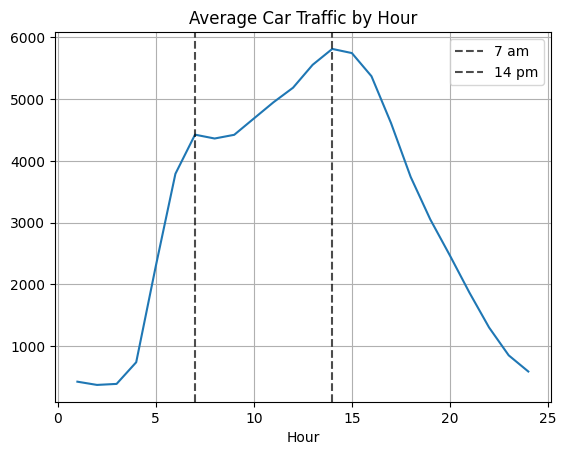

In [14]:
#plot of car traffic by hour
plt.plot(hour, hourValue)
plt.grid()
plt.title('Average Car Traffic by Hour')
plt.xlabel('Hour')
plt.axvline(7, color='black', label = '7 am', linestyle='--', alpha=.7)
plt.axvline(14, color='black', label='14 pm', linestyle='--', alpha=.7)
plt.legend()
plt.show()

We see clearly defined peaks throughout the day. 7 seems to be the morning rush hour

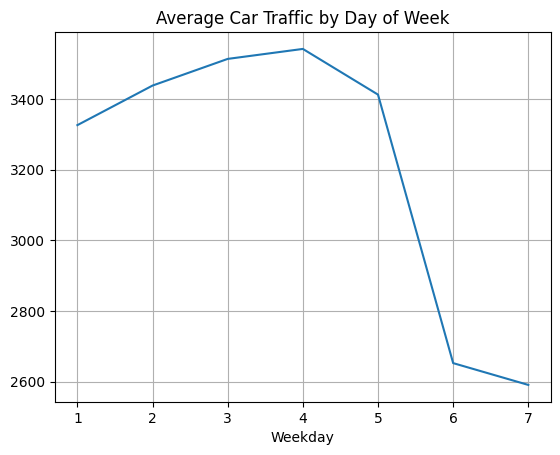

In [15]:
#plot of car traffic by weekday
plt.plot(weekday, weekdayValue)
plt.grid()
plt.title('Average Car Traffic by Day of Week')
plt.xlabel('Weekday')
plt.show()

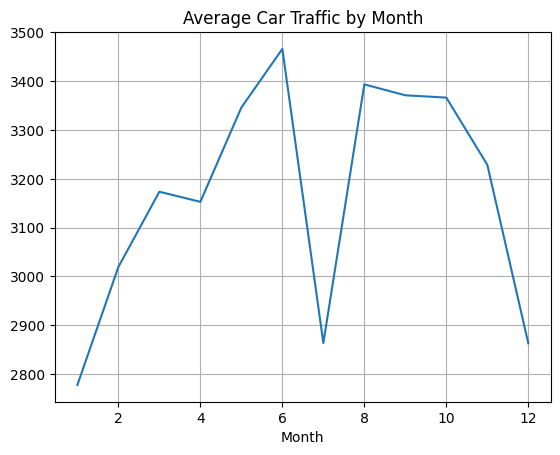

In [16]:
#plot of car traffic by month
july = nonNA.groupby(nonNA['Fra'].dt.month)['Trafikkmengde'].describe()['mean'].min()
plt.plot(month, monthValue)
plt.grid()
plt.title('Average Car Traffic by Month')
plt.xlabel('Month')
plt.show()

In [102]:
#replace the default - with 0
#f['Trafikkmengde'] = f['Trafikkmengde'].replace('-', '0')
f['Trafikkmengde'] = f['Trafikkmengde'].astype(int)

In [103]:
#målinger fra de forskjellige veiene
f.Navn.value_counts(normalize=True)

Navn
Frognerstranda sykkel 03    0.500057
Maritim                     0.499943
Name: proportion, dtype: float64

In [104]:
#De forskjellige feltene: 
f.groupby('Navn')['Felt'].value_counts()

Navn                      Felt  
Frognerstranda sykkel 03  Totalt    26328
Maritim                   Totalt    26322
Name: count, dtype: int64

In [105]:
f[f['Felt']=='Totalt'].groupby('Navn')['Trafikkmengde'].describe()

,count,mean,std,min,25%,50%,75%,max
Navn,,,,,,,,
Frognerstranda sykkel 03,26328.0,87.038476,142.788025,0.0,3.0,24.0,112.0,1008.0
Maritim,26322.0,3267.401641,2252.026361,106.0,956.0,3371.5,5278.0,8031.0


In [106]:
#creating hour column from time start time 
f['fra_time'] = f['Fra tidspunkt'].str.split(':').str[0].astype(int)

In [107]:
len(f.Navn.unique())

2

In [108]:
#cleaner columns to indicate vehicle vs bike
f['motor'] = (f['Navn'] == 'Maritim')
f['sykkel'] = (f['Navn'] == 'Frognerstranda sykkel 03')

In [109]:
#column to indicate summer/winter time. 
f['summertime'] = (f['Fra'].str.split(':').str[1].str.split('+').str[1].astype(int) == 2)

#column for utc - NEEDED FOR MERGING WITH WEATHER DATA
f['utc'] = pd.to_datetime(f['Fra'], utc=True)

In [110]:
#Adding day of week column: 
f['dayofweek'] = f['utc'].dt.dayofweek

dayofweek_dict = {
    0: 'monday', 
    1: 'tuesday', 
    2: 'wednesday', 
    3: 'thursday', 
    4: 'friday', 
    5: 'saturday', 
    6: 'sunday'
}

f['dayofweek'] = f['dayofweek'].map(dayofweek_dict)

print(f['dayofweek'].unique())

workingdays = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']
rushhours = [7,8,9,15,16,17]

#adding column to indicate rush hour
f['rush'] = (f['fra_time'].isin(rushhours) & f['dayofweek'].isin(workingdays))  #Important to use 'fra_time' since it is not UTC!!
f.rush.value_counts(normalize=True)

['monday' 'tuesday' 'wednesday' 'thursday' 'friday' 'saturday' 'sunday']


rush
False    0.821311
True     0.178689
Name: proportion, dtype: float64

In [111]:
df = f[['Fra','utc','Dato', 'Trafikkmengde','rush', 'motor', 'sykkel', 'summertime', 'dayofweek']].copy()
df

,Fra,utc,Dato,Trafikkmengde,rush,motor,sykkel,summertime,dayofweek
4,2022-11-01T00:00+01:00,2022-10-31 23:00:00+00:00,2022-11-01,1,False,False,True,False,monday
9,2022-11-01T01:00+01:00,2022-11-01 00:00:00+00:00,2022-11-01,2,False,False,True,False,tuesday
14,2022-11-01T02:00+01:00,2022-11-01 01:00:00+00:00,2022-11-01,0,False,False,True,False,tuesday
19,2022-11-01T03:00+01:00,2022-11-01 02:00:00+00:00,2022-11-01,1,False,False,True,False,tuesday
24,2022-11-01T04:00+01:00,2022-11-01 03:00:00+00:00,2022-11-01,2,False,False,True,False,tuesday
...,...,...,...,...,...,...,...,...,...
263479,2025-11-01T19:00+01:00,2025-11-01 18:00:00+00:00,2025-11-01,3783,False,True,False,False,saturday
263489,2025-11-01T20:00+01:00,2025-11-01 19:00:00+00:00,2025-11-01,2824,False,True,False,False,saturday
263499,2025-11-01T21:00+01:00,2025-11-01 20:00:00+00:00,2025-11-01,2325,False,True,False,False,saturday
263509,2025-11-01T22:00+01:00,2025-11-01 21:00:00+00:00,2025-11-01,2180,False,True,False,False,saturday


In [112]:
df.to_csv('trafficFrogner.csv', index=False)